<a href="https://colab.research.google.com/github/h0806449f/TensorFlow/blob/main/Tibame_TensorFlow_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

深度學習 概要步驟
1. 隨機係數
2. 設定 Loss function  
    `係數的變化, 帶動 Loss 變化 -> 斜率`  
3. 調整所有係數, 讓 Loss 最小

In [68]:
# import datasets

from tensorflow.keras.datasets import mnist
( (x_train, y_train), (x_test, y_test) ) = mnist.load_data()

In [69]:
# check shape

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

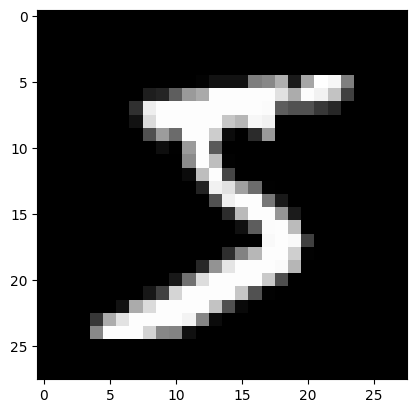

In [70]:
# check image (pandas & matplotlib)

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(x_train[0])
plt.imshow(x_train[0], cmap="gray")  # cmap="gray_r"

激活函式 (Activation)  
`中間層`
1. Sigmoid : 所有中間層如果都使用sigmoid -> 會有梯度消失的問題  
    越前面的係數, 對 Loss 影響越小 (因為經過了越多次 0~1 相乘)  

2. Relu : 激活前數值為0, 激活後斜率為1 -> 舒緩梯度消失的問題  
  
`輸出層`
1. Sigmoid : 答案類別,不互斥
2. SoftMax : 互斥


In [71]:
# choose models
# models(架構) : Sequential(一層疊一層), Model(自由疊層)
# layers : Dense(全連接層)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

layers = [
    Dense(256, activation="relu", input_dim=784),
    Dense(10, activation="softmax")
]

model = Sequential(layers)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               200960    
                                                                 
 dense_11 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


Loss Function (損失函式)
1. MSE : 預測值與真實值的距離越小越好  
  $(predict - true)^2$

2. CrossEntorpy : 為了避免模型都預測某一邊, CE設計於模型都預測某一邊時, Loss會被放大  
    僅有預測值與資料分布越接近時, Loss值會越小

In [72]:
# compile

# model.compile(loss="mse", metrics=["accuracy"])

# 計算機率的案例時, 較好的Loss函式 Crossentropy

from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(loss=CategoricalCrossentropy(), metrics=["accuracy"])

In [73]:
# 將答案轉成機率

from tensorflow.keras.utils import to_categorical

y_train_categorical = to_categorical(y_train, num_classes=10)
y_test_categorical = to_categorical(y_test, num_classes=10)

y_train[0], y_train_categorical[0]  # check

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

In [74]:
# 將問題標準化
# 因 tensorflow 隨機的weight 有配合
# 因 tensorflow 建議 x(0 ~ 1) or x(-1 ~ 1)
# reshape 支援 -1 自動計算

x_train_normalize = x_train.reshape(60000, 784) / 255.0
x_test_normalize = x_test.reshape(10000, 784) / 255.0

x_train_normalize.shape, x_test_normalize.shape  # check

((60000, 784), (10000, 784))

In [75]:
# fit
# batch_size : 檢視幾筆資料之後 調整一次係數
# epochs : 所有資料 想要看過幾次
# validation_split : 部分資料用於驗證參數表現

# 原60000筆資料 -> 0.1 validation (54000筆資料) -> 100 batch_size (540次調整)
# 20 epochs -> 共 540 * 20 次調整 

# model.fit(x_train_normalize,
#       y_train_categorical,
#       batch_size=100,
#       epochs=20,
#       validation_split=0.1)

# model checkpoint

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callback_list = [
    ModelCheckpoint("mnist.h5", save_best_only=True),  # 自動將最好的參數儲存為 mnist.h5
    EarlyStopping(monitor="val_loss", restore_best_weights=True, patience=7)
]

model.fit(x_train_normalize,
      y_train_categorical,
      batch_size=100,
      epochs=20,
      validation_split=0.1,
      callbacks=callback_list)

Epoch 1/20
540/540 [==============================] - 4s 6ms/step - loss: 0.2974 - accuracy: 0.9148 - val_loss: 0.1323 - val_accuracy: 0.9625
Epoch 2/20
540/540 [==============================] - 3s 6ms/step - loss: 0.1294 - accuracy: 0.9621 - val_loss: 0.0977 - val_accuracy: 0.9730
Epoch 3/20
540/540 [==============================] - 4s 8ms/step - loss: 0.0877 - accuracy: 0.9741 - val_loss: 0.0858 - val_accuracy: 0.9770
Epoch 4/20
540/540 [==============================] - 3s 6ms/step - loss: 0.0655 - accuracy: 0.9800 - val_loss: 0.0764 - val_accuracy: 0.9783
Epoch 5/20
540/540 [==============================] - 5s 9ms/step - loss: 0.0508 - accuracy: 0.9849 - val_loss: 0.0707 - val_accuracy: 0.9790
Epoch 6/20
540/540 [==============================] - 4s 8ms/step - loss: 0.0401 - accuracy: 0.9882 - val_loss: 0.0677 - val_accuracy: 0.9807
Epoch 7/20
540/540 [==============================] - 3s 6ms/step - loss: 0.0324 - accuracy: 0.9904 - val_loss: 0.0681 - val_accuracy: 0.9810
Epoch 

In [76]:
model.predict(x_test_normalize)

313/313 [==============================] - 1s 3ms/step


array([[6.55936772e-09, 2.88743224e-10, 3.98929160e-06, ...,
        9.99972641e-01, 5.86905919e-08, 1.36596573e-05],
       [1.12656636e-07, 2.89083517e-04, 9.99648333e-01, ...,
        3.46016889e-14, 3.00381635e-05, 2.62115806e-12],
       [1.16557476e-06, 9.98241127e-01, 4.94794695e-05, ...,
        8.02904426e-04, 6.84391416e-04, 1.62969554e-05],
       ...,
       [1.46220601e-12, 5.04377659e-12, 1.52125426e-12, ...,
        3.40899078e-06, 2.47681186e-07, 4.29691536e-05],
       [7.78547289e-08, 8.93415286e-10, 6.73193584e-11, ...,
        4.76133373e-08, 5.09310848e-05, 1.21659960e-09],
       [1.01143609e-08, 6.51652235e-13, 2.22904206e-09, ...,
        1.14658471e-14, 3.93430323e-11, 1.60649508e-10]], dtype=float32)

In [77]:
model.evaluate(x_test_normalize, y_test_categorical)

313/313 [==============================] - 1s 3ms/step - loss: 0.0705 - accuracy: 0.9777


[0.07051160931587219, 0.9776999950408936]

argmax()  
1. 不帶參數, 會將所有數值都轉為一維, 並列出最大值index
2. 代數參數  
    2.1 axis=0 直的看  
    2.2 axis=1 橫的看

In [78]:
model.predict(x_test_normalize).argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [79]:
from sklearn.metrics import confusion_matrix

pre = model.predict(x_test_normalize).argmax(axis=1)
mat = confusion_matrix(y_test, pre)

pd.DataFrame(mat,
        index=["{}(true)".format(i) for i in range(10)],
        columns=["{}(true)".format(i) for i in range(10)])

313/313 [==============================] - 1s 2ms/step


,0(true),1(true),2(true),3(true),4(true),5(true),6(true),7(true),8(true),9(true)
0(true),970,0,1,1,0,1,2,1,3,1
1(true),0,1123,2,1,0,1,2,2,4,0
2(true),4,3,992,7,4,0,2,7,13,0
3(true),0,0,0,989,1,2,0,7,6,5
4(true),2,0,4,0,953,0,3,2,0,18
5(true),3,0,0,11,1,860,6,0,7,4
6(true),4,2,0,1,2,3,944,0,2,0
7(true),1,3,5,1,0,0,0,1008,2,8
8(true),1,0,2,4,2,3,3,4,946,9
9(true),1,2,0,3,6,1,1,3,0,992


In [80]:
# 找出預測錯誤的index

import numpy as np

false_predict_index = np.nonzero(y_test != pre)[0]
false_predict_index[:100]  # 取前100

array([ 115,  247,  321,  381,  435,  445,  447,  495,  582,  619,  646,
        659,  684,  691,  707,  720,  726,  740,  846,  947,  951,  965,
       1014, 1032, 1039, 1044, 1112, 1128, 1178, 1224, 1226, 1232, 1242,
       1247, 1289, 1319, 1356, 1378, 1393, 1395, 1413, 1500, 1522, 1530,
       1549, 1609, 1611, 1621, 1681, 1790, 1828, 1850, 1878, 1901, 1984,
       2004, 2018, 2024, 2035, 2044, 2052, 2053, 2070, 2098, 2109, 2118,
       2135, 2148, 2182, 2186, 2224, 2272, 2293, 2369, 2387, 2447, 2454,
       2488, 2514, 2597, 2607, 2654, 2877, 2939, 2953, 3012, 3073, 3117,
       3289, 3330, 3405, 3422, 3474, 3503, 3520, 3533, 3558, 3565, 3567,
       3597])

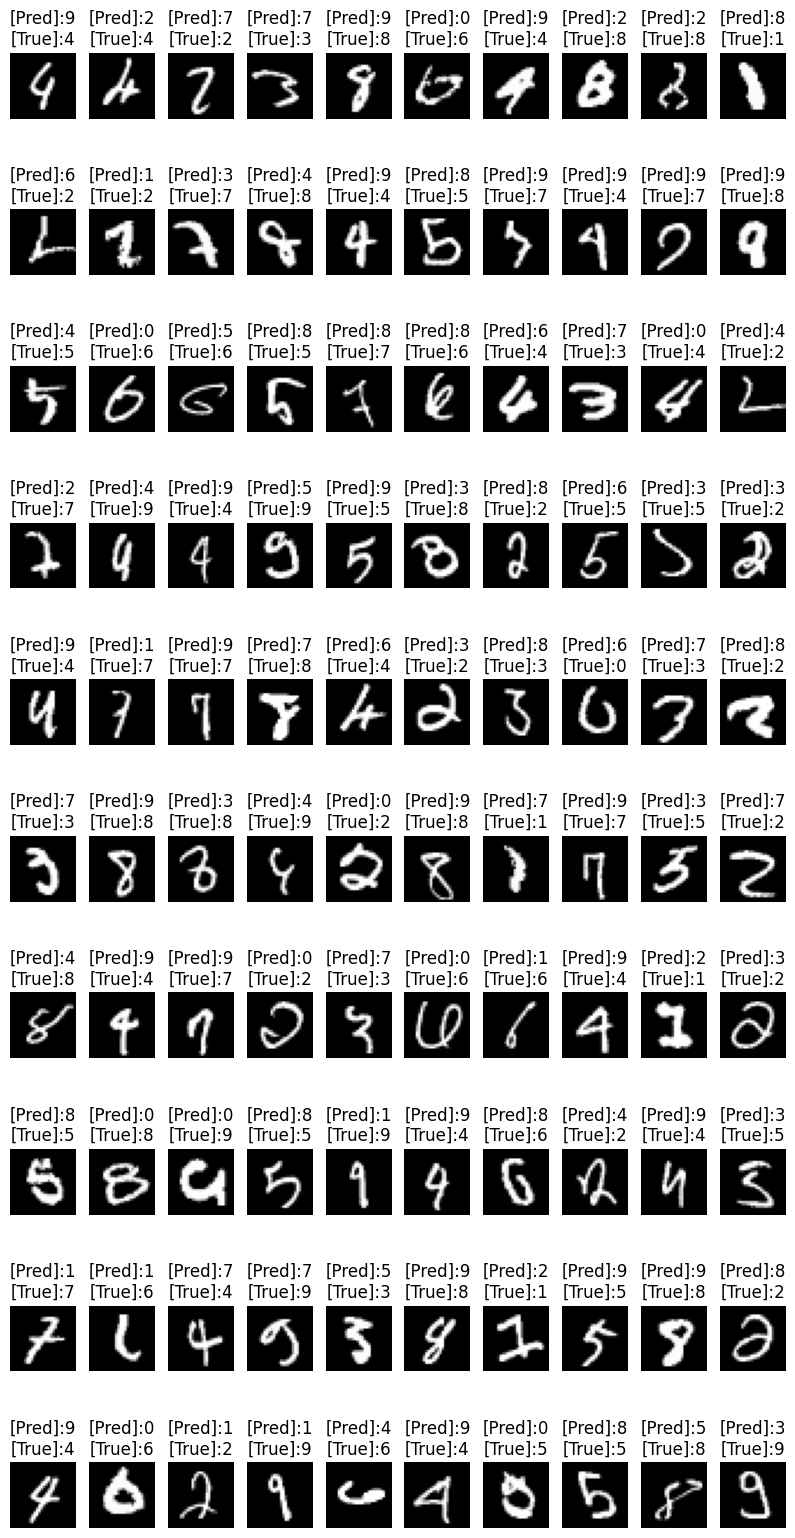

In [81]:
# subplot

plt.figure(figsize=(10, 20))
# 預測錯誤的 預測值
false_prediction = pre[false_predict_index]
# 預測錯誤的 真實值
false_prediction_true_number = y_test[false_predict_index]
# 預測錯誤的 圖片
false_prediction_image = x_test[false_predict_index]

for i in range(len(false_predict_index[:100])):
    plt.subplot(10, 10, i+1)
    plt.imshow(false_prediction_image[i], cmap="gray")
    plt.axis("off")
    title = "[Pred]:{}\n[True]:{}".format(false_prediction[i], false_prediction_true_number[i])
    plt.title(title)